In [47]:
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_71f978a3e32443a4a5dc53149261a8eb = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='WcIvUStCzqUCBI_6Q-gZKL7wK69eoC70AXkY0-foUMbV',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_71f978a3e32443a4a5dc53149261a8eb.get_object(Bucket='lifeexpectancy-donotdelete-pr-oyyxxpgtwpwjjr',Key='dataset.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

# If you are reading an Excel file into a pandas DataFrame, replace `read_csv` by `read_excel` in the next statement.
df_data_0 = pd.read_csv(body)
df_data_0.head()






,Country,Status,Year,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,Income composition of resources,Schooling,Life expectancy
0,Afghanistan,Developing,2015,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,0.479,10.1,65.0
1,Afghanistan,Developing,2014,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,0.476,10.0,59.9
2,Afghanistan,Developing,2013,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,0.470,9.9,59.9
3,Afghanistan,Developing,2012,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,0.463,9.8,59.5
4,Afghanistan,Developing,2011,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,0.454,9.5,59.2


In [48]:
df_data_0.fillna(df_data_0.mean(), inplace=True)
df_data_0.round(2)
df_data_0.head()

,Country,Status,Year,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,Income composition of resources,Schooling,Life expectancy
0,Afghanistan,Developing,2015,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,0.479,10.1,65.0
1,Afghanistan,Developing,2014,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,0.476,10.0,59.9
2,Afghanistan,Developing,2013,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,0.470,9.9,59.9
3,Afghanistan,Developing,2012,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,0.463,9.8,59.5
4,Afghanistan,Developing,2011,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,0.454,9.5,59.2


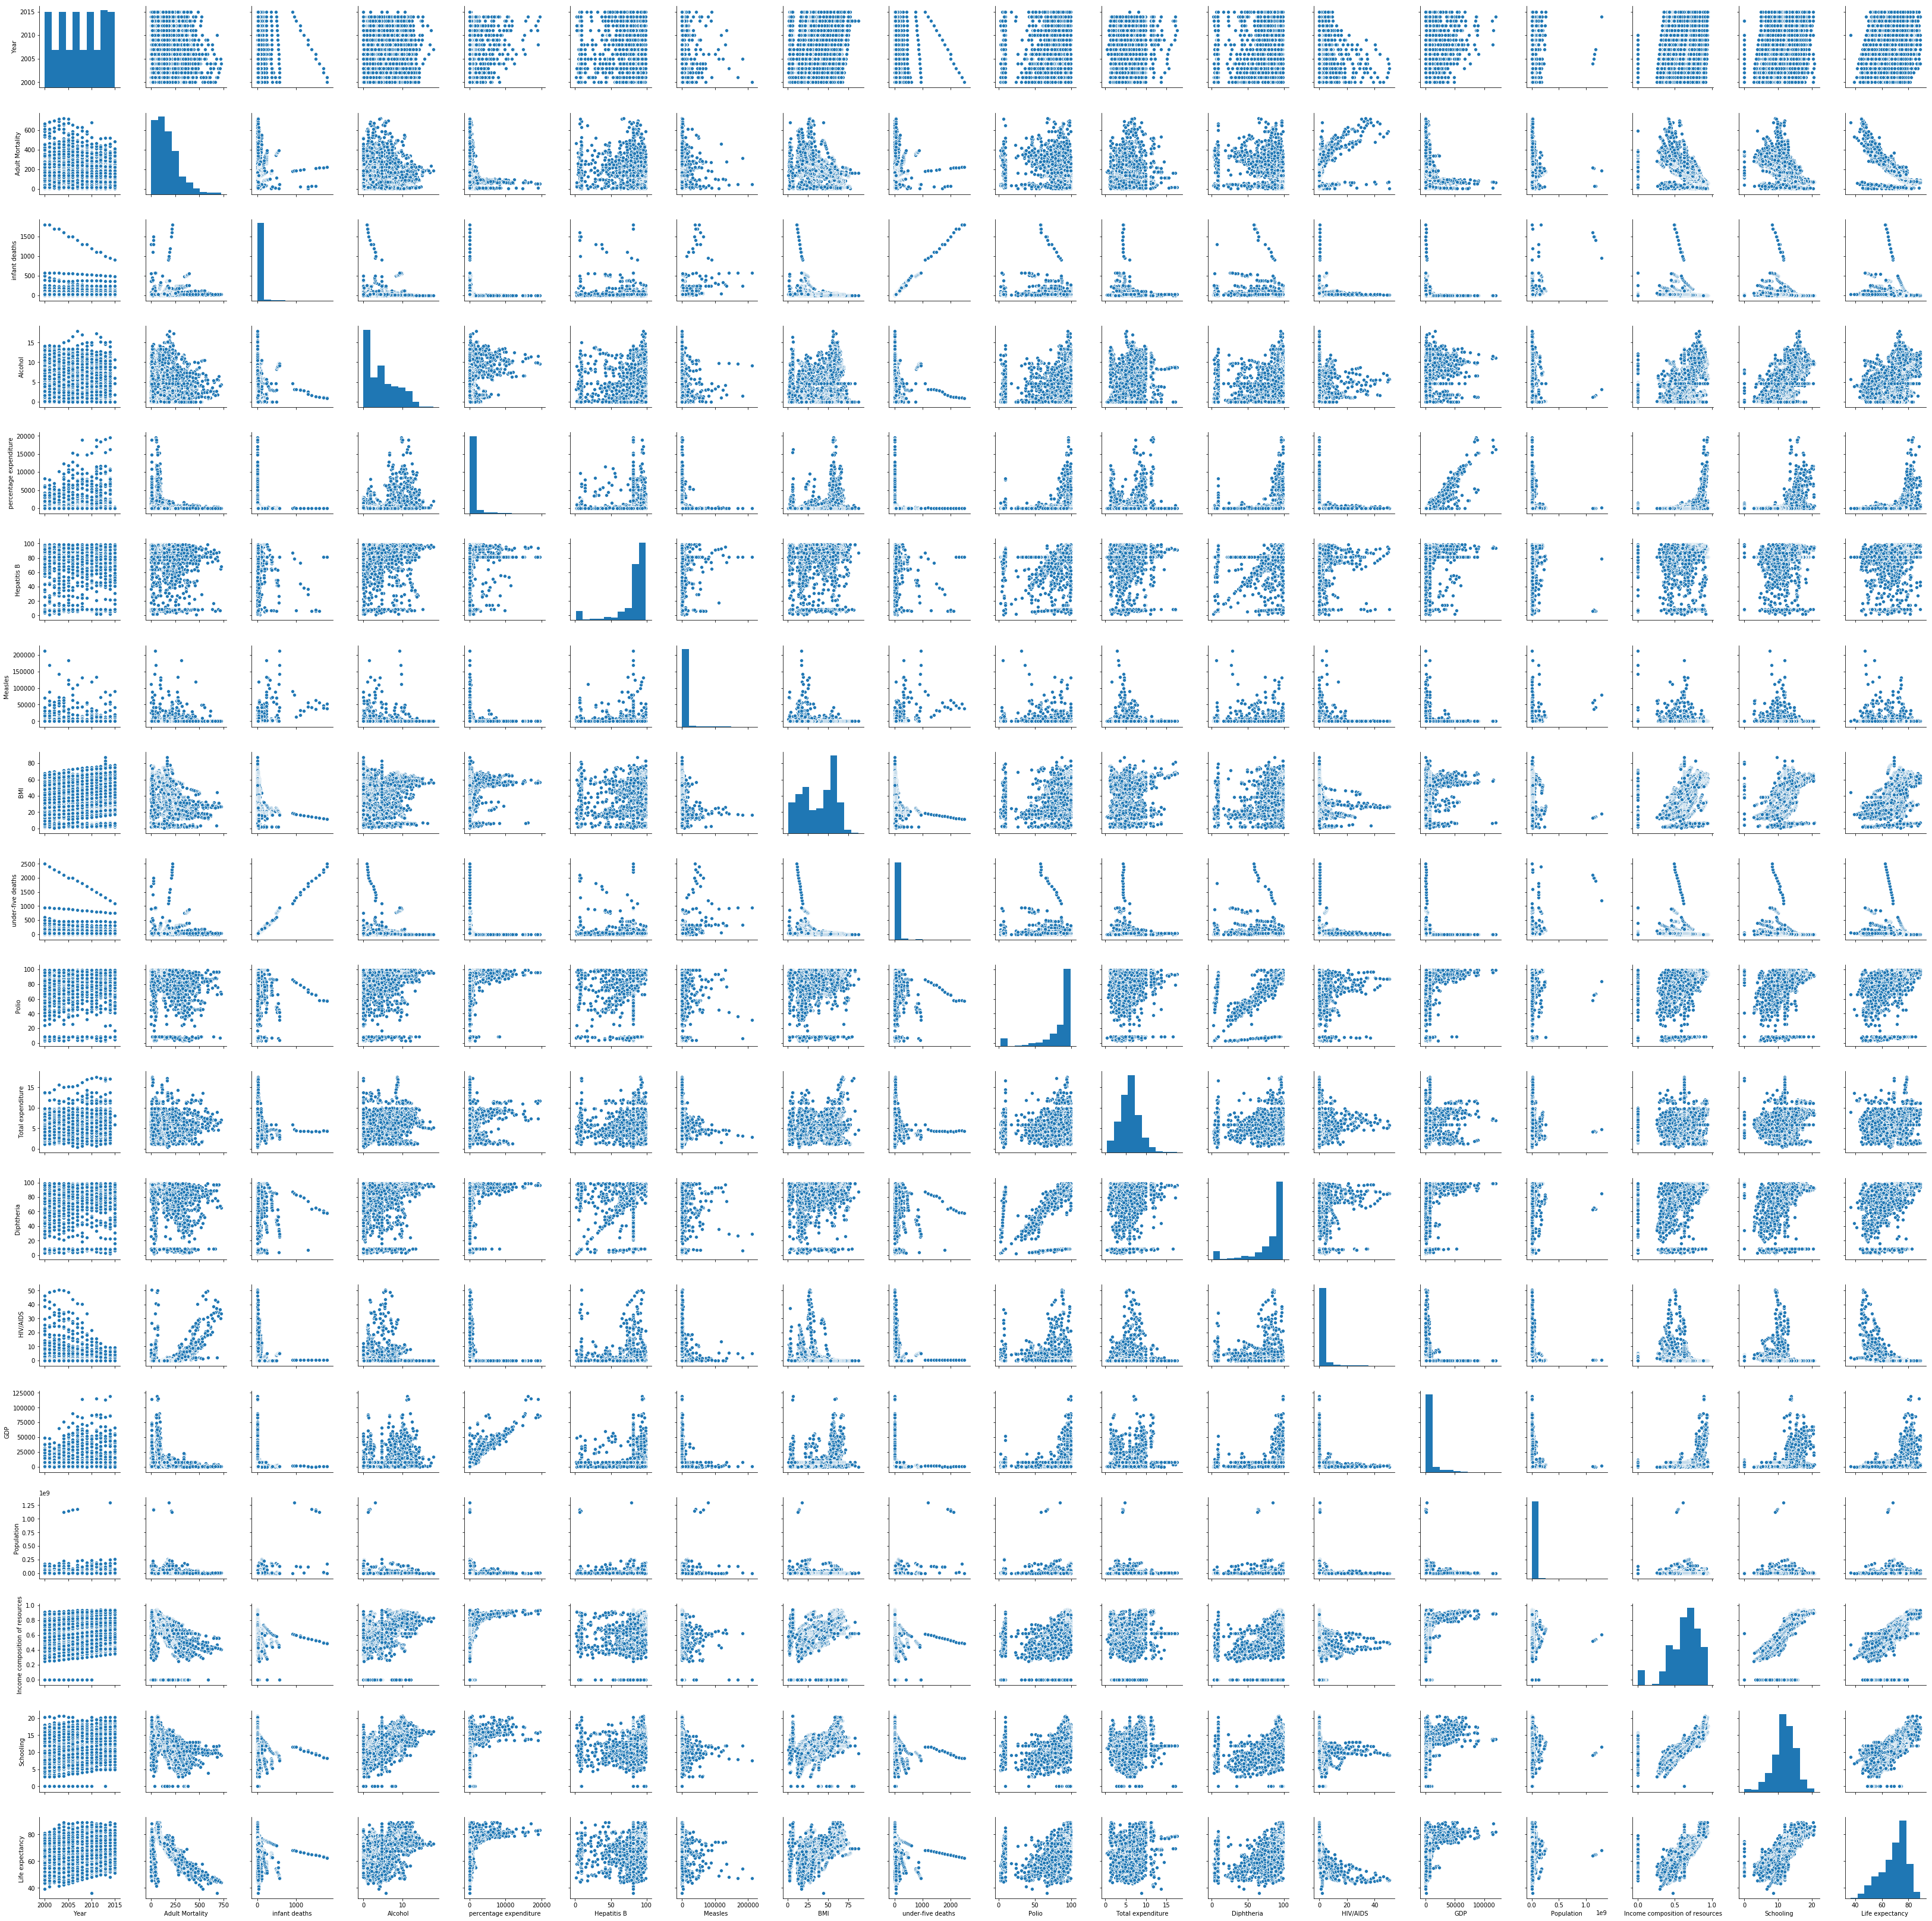

In [49]:
import seaborn as sns
sns.pairplot(df_data_0)


In [50]:
X=df_data_0.iloc[:,1:-1]
y=df_data_0.iloc[:,-1].values
print(type(y))
print(y.shape)#.select_dtypes(include=[object])
#print(X.head(4))

<class 'numpy.ndarray'>
(2938,)


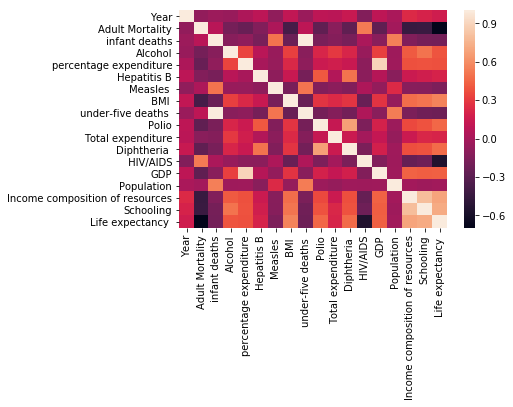

In [51]:
sns.heatmap(df_data_0.corr())



In [54]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
X['Status']=le.fit_transform(X['Status'])
print(X.head)
print("------------------------")
print(y)

<bound method NDFrame.head of       Status  Year  Adult Mortality  infant deaths   Alcohol  \
0          1  2015            263.0             62  0.010000   
1          1  2014            271.0             64  0.010000   
2          1  2013            268.0             66  0.010000   
3          1  2012            272.0             69  0.010000   
4          1  2011            275.0             71  0.010000   
5          1  2010            279.0             74  0.010000   
6          1  2009            281.0             77  0.010000   
7          1  2008            287.0             80  0.030000   
8          1  2007            295.0             82  0.020000   
9          1  2006            295.0             84  0.030000   
10         1  2005            291.0             85  0.020000   
11         1  2004            293.0             87  0.020000   
12         1  2003            295.0             87  0.010000   
13         1  2002              3.0             88  0.010000   
14        

In [55]:
'''from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
enc.fit(X)

# 3. Transform
onehotlabels = enc.transform(X).toarray()
onehotlabels.shape '''

'from sklearn.preprocessing import OneHotEncoder\nenc = OneHotEncoder()\nenc.fit(X)\n\n# 3. Transform\nonehotlabels = enc.transform(X).toarray()\nonehotlabels.shape '

In [57]:
X=X.to_numpy()
print(X[0])#print(onehotlabels)

[1.00000000e+00 2.01500000e+03 2.63000000e+02 6.20000000e+01
 1.00000000e-02 7.12796236e+01 6.50000000e+01 1.15400000e+03
 1.91000000e+01 8.30000000e+01 6.00000000e+00 8.16000000e+00
 6.50000000e+01 1.00000000e-01 5.84259210e+02 3.37364940e+07
 4.79000000e-01 1.01000000e+01]


In [58]:
print(X)

[[1.0000000e+00 2.0150000e+03 2.6300000e+02 ... 3.3736494e+07
  4.7900000e-01 1.0100000e+01]
 [1.0000000e+00 2.0140000e+03 2.7100000e+02 ... 3.2758200e+05
  4.7600000e-01 1.0000000e+01]
 [1.0000000e+00 2.0130000e+03 2.6800000e+02 ... 3.1731688e+07
  4.7000000e-01 9.9000000e+00]
 ...
 [1.0000000e+00 2.0020000e+03 7.3000000e+01 ... 1.2552500e+05
  4.2700000e-01 1.0000000e+01]
 [1.0000000e+00 2.0010000e+03 6.8600000e+02 ... 1.2366165e+07
  4.2700000e-01 9.8000000e+00]
 [1.0000000e+00 2.0000000e+03 6.6500000e+02 ... 1.2222251e+07
  4.3400000e-01 9.8000000e+00]]


In [59]:
import numpy as np
print(np.any(np.isnan(X)))
print(np.all(np.isfinite(X)))


False
True


In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [61]:
print(type(X_test))

print(reg.predict(X_test))

<class 'numpy.ndarray'>
[76.71230724 66.17981558 53.54801098 66.57681891 59.46619665 61.00138754
 71.31341334 79.04619469 70.60563373 46.980491   67.78565795 80.15619463
 72.49048026 73.56451047 61.42263258 72.00071627 59.72562004 66.8772447
 70.19680536 80.96396997 69.66585187 74.14126371 73.25245652 80.94465028
 67.66565545 61.07055675 82.333849   72.13971949 70.59783742 72.73968272
 75.74900466 53.20455583 75.26510559 76.52517573 75.39835279 71.76869272
 74.36602922 83.95410624 63.09930786 70.88202494 64.39893645 72.92593335
 75.82102417 73.76260292 71.6560378  78.66917326 59.05552969 72.77690726
 54.72189384 71.9568822  74.45825734 62.09483291 78.37913295 69.46205208
 68.22743949 71.27928056 80.9922105  71.3981191  59.85884382 71.11125339
 69.79856385 70.98808395 72.04841693 67.82554751 57.56541721 73.83929982
 71.0993459  73.8513698  64.67278461 76.27986668 70.71479465 79.10256477
 80.47852162 75.53579554 67.04926998 50.4451058  67.73537753 63.49184438
 71.74420842 71.28331684 81.

In [62]:
print(reg.predict([[1,2015,295,62,0.01,71.27962,65,1154,19.1,83,6,8.16,65,0.1,584.2592,33736494,0.479,10.1]]))

from sklearn.metrics import r2_score
print(r2_score(y_test,reg.predict(X_test)))

[60.90283577]
0.8200397795880483


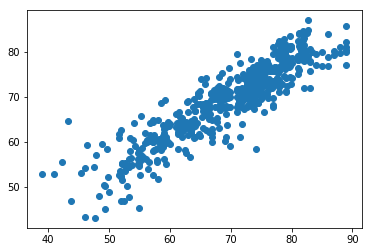

In [63]:
import matplotlib.pyplot as plt

plt.scatter(y_test,reg.predict(X_test))

In [64]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,reg.predict(X_test) ))
print('MSE:', metrics.mean_squared_error(y_test, reg.predict(X_test)))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, reg.predict(X_test))))

MAE: 3.016093281533191
MSE: 16.38383780179291
RMSE: 4.047695369193797


In [65]:
!pip install watson-machine-learning-client

In [66]:
from watson_machine_learning_client import WatsonMachineLearningAPIClient

2020-05-28 11:28:46,081 - watson_machine_learning_client.metanames - WARNING - 'AUTHOR_EMAIL' meta prop is deprecated. It will be ignored.


In [67]:
wml_credentials={
  "apikey": "W1vPjMQ7V0vEpclsr85VYrpn4UP2rxfwcr913Vz1IKnr",
  "instance_id": "8b525535-d7fe-47e9-af43-32fc74068fb5",
  "url": "https://us-south.ml.cloud.ibm.com"
}

In [68]:
client = WatsonMachineLearningAPIClient( wml_credentials )

In [69]:
model_props = {client.repository.ModelMetaNames.AUTHOR_NAME: "Jasbir", 
               client.repository.ModelMetaNames.AUTHOR_EMAIL: "jasbir.sb123@gmail.com", 
               client.repository.ModelMetaNames.NAME: "LifeExpectancy"}

In [70]:
model_artifact =client.repository.store_model(reg, meta_props=model_props)

In [71]:
published_model_uid = client.repository.get_model_uid(model_artifact)

In [72]:
published_model_uid

'ab4c07f6-de2f-49a5-9eff-ab97ff1faf7a'

In [73]:
deployment = client.deployments.create(published_model_uid, name="LifeExpectancy")



#######################################################################################

Synchronous deployment creation for uid: 'ab4c07f6-de2f-49a5-9eff-ab97ff1faf7a' started

#######################################################################################


INITIALIZING
DEPLOY_SUCCESS


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='d9fcfd76-bb8a-4852-a5ef-bcfe60c6234e'
------------------------------------------------------------------------------------------------




In [74]:
scoring_endpoint = client.deployments.get_scoring_url(deployment)

In [75]:
scoring_endpoint

'https://us-south.ml.cloud.ibm.com/v3/wml_instances/8b525535-d7fe-47e9-af43-32fc74068fb5/deployments/d9fcfd76-bb8a-4852-a5ef-bcfe60c6234e/online'